# Equação do Tempo (ET)

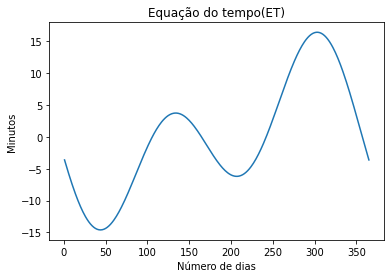

[ -3.60687332  -4.05362763  -4.49562327  -4.93245193  -5.36371142
  -5.78900607  -6.2079472   -6.62015354  -7.02525167  -7.42287636
  -7.81267107  -8.19428826  -8.56738979  -8.93164732  -9.28674264
  -9.63236799  -9.96822644 -10.2940322  -10.6095109  -10.9143999
 -11.20844857 -11.49141855 -11.76308401 -12.02323188 -12.27166206
 -12.50818765 -12.73263512 -12.94484448 -13.14466948 -13.33197769
 -13.50665067 -13.66858408 -13.81768775 -13.95388577 -14.07711654
 -14.18733284 -14.28450184 -14.36860509 -14.43963853 -14.4976125
 -14.54255164 -14.57449485 -14.59349526 -14.59962009 -14.59295054
 -14.57358171 -14.54162242 -14.49719509 -14.44043553 -14.37149279
 -14.29052892 -14.1977188  -14.09324987 -13.97732189 -13.8501467
 -13.71194792 -13.56296067 -13.4034313  -13.23361702 -13.05378561
 -12.86421508 -12.6651933  -12.45701767 -12.2399947  -12.01443969
 -11.78067629 -11.5390361  -11.28985828 -11.03348914 -10.77028166
 -10.50059511 -10.22479458  -9.94325055  -9.65633841  -9.36443803
  -9.06793327

In [126]:
##1

import numpy as np                  # Biblioteca para cálculos estatísticos 
import matplotlib.pyplot as plt     # Biblioteca de visualização de dados
import math as mt                   # Biblioteca para operações matematicas 
import pandas as pd
T = np.pi/180 #Transformação para radianos

sind=lambda a:np.sin(T*a)
cosd=lambda a:np.cos(T*a)
tand=lambda a:np.tan(T*a)
acosd=lambda a:(1/T)*np.arccos(a)
asind=lambda a:(1/T)*np.arcsin(a)
atand=lambda a:(1/T)*np.arctan(a)

# N = Números do dia no ano
# B = ??
N = np.arange(1,366)
B = (N - 81)*360/364

ET =9.87*sind(2*B)-7.53*cosd(B)-1.5*sind(B)

plt.plot(N, ET)
plt.title('Equação do tempo(ET)')
plt.xlabel('Número de dias')
plt.ylabel('Minutos')
plt.show()
print(ET)

# Declinação solar (delta)

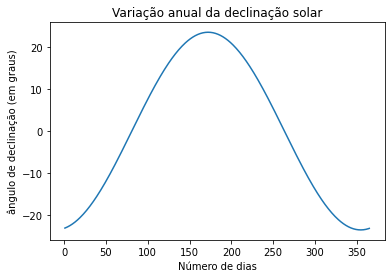

In [72]:
##2

delta =23.45*sind((360/365*(284 + N)))

plt.plot(N, delta)
plt.title('Variação anual da declinação solar')
plt.xlabel('Número de dias')
plt.ylabel('ângulo de declinação (em graus)')
plt.show()


# Tempo Solar Aparente (TSA) para Natal-RN


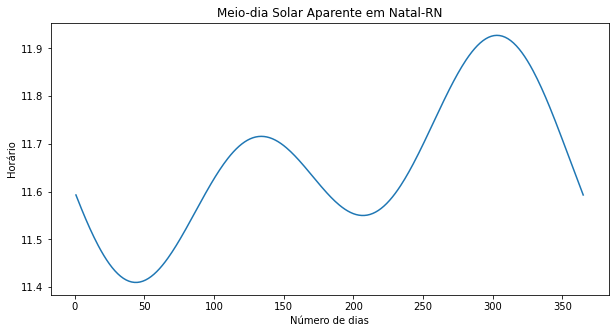

In [98]:
##3

HPL =np.arange(1,25); HPL=HPL*60   # Horário Padrão Local (Horário do relógio)
HV = 0                              # Horário de Verão (0 ou 60 minutos)
SL = 30                             # Longitude Padrão Local
Long = 35.20298                     # Longitude do Local (Natal-RN)
D = 1                               # 0 para local a leste e 1 a oeste de Greenwich
TSA =  np.empty([365,24]) # antes: w,h=365,24; np.array([[0 for i in range(h)] for j in range(w)]) 

if D==0:
    for i in range(365):
       for j in range(24):
             TSA[i][j] = HPL[j] + ET[i] - 4*(SL - Long) - HV
             
else:
    for i in range(365):
       for j in range(24): 
            TSA[i][j] = HPL[j] + ET[i] + 4*(SL - Long) - HV
           
            

TSA = TSA/60
plt.figure(figsize = [10,5])
plt.plot(N, TSA[:,11])
plt.title('Meio-dia Solar Aparente em Natal-RN')
plt.xlabel('Número de dias')
plt.ylabel('Horário')
plt.show()

# Ângulo horário (h)
* Ângulo através do qual a Terra giraria para trazer o meridiano ao ponto diretamente sob o sol.

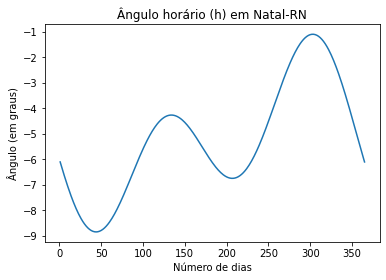

In [45]:
##4
h = (TSA - 12)*15

plt.plot(N,h[:,11])
plt.title('Ângulo horário (h) em Natal-RN')
plt.xlabel('Número de dias')
plt.ylabel('Ângulo (em graus)')
plt.show()

# Ângulo Zenital e Alfa 
* ângulo entre os raios solares e o plano vertical 
* ângulo entre os raios solares e o plano horizontal (respectivamente).




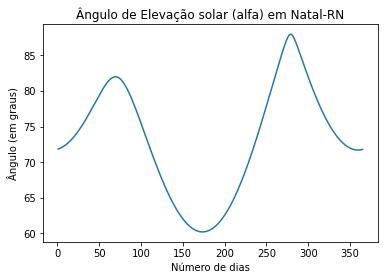

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,149.858293,142.874680,132.283375,119.981060,106.849583,93.298528,79.547564,65.749418,52.065423,38.774736,26.613030,18.143958,19.185999,28.718882,41.195343,54.592753,68.313322,82.113627,95.839874,109.332977,122.350063,134.422480,144.526282,150.529197
1,149.966880,143.003692,132.413655,120.106719,106.969123,93.411414,79.653150,65.846394,52.151011,38.842629,26.646886,18.103082,19.066296,28.588470,41.072104,54.477882,68.206574,82.015209,95.750783,109.255383,122.288144,134.384221,144.526353,150.586021
2,150.081418,143.137057,132.546717,120.233970,107.089352,93.524250,79.758026,65.942009,52.234523,38.907556,26.676537,18.056408,18.941230,28.455215,40.947700,54.362906,68.100501,81.918128,95.663665,109.180430,122.229633,134.350301,144.531863,150.649178
3,150.201878,143.274709,132.682472,120.362721,107.210177,93.636951,79.862116,66.036199,52.315910,38.969494,26.701994,18.003962,18.810830,28.319210,40.822237,54.247925,67.995197,81.822472,95.578593,109.108180,122.174575,134.320742,144.542809,150.718654
4,150.328228,143.416579,132.820833,120.492875,107.331507,93.749429,79.965342,66.128900,52.395126,39.028421,26.723271,17.945777,18.675131,28.180551,40.695822,54.133046,67.890758,81.728323,95.495640,109.038689,122.123009,134.295562,144.559189,150.794435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,149.439620,142.368715,131.766766,119.478800,106.368778,92.841999,79.118276,65.352805,51.712666,38.491101,26.464257,18.293436,19.651669,29.235796,41.689447,55.056931,68.747458,82.516386,96.207038,109.655799,122.611835,134.591233,144.543069,150.319571
361,149.517547,142.474546,131.881373,119.594595,106.482960,92.953274,79.225655,65.454990,51.807297,38.572925,26.519054,18.282432,19.559832,29.121384,41.574079,54.944637,68.639304,82.413123,96.109770,109.566464,122.534032,134.531988,144.516044,150.344247
362,149.601531,142.584964,131.999088,119.712341,106.598186,93.064834,79.332627,65.556071,51.900040,38.651862,26.569561,18.265484,19.462540,29.003801,41.457145,54.831842,68.531455,82.310864,96.014186,109.479538,122.459477,134.477016,144.494487,150.375324
363,149.691550,142.699919,132.119836,119.831953,106.714370,93.176594,79.439112,65.655975,51.990834,38.727875,26.615775,18.242611,19.359811,28.883116,41.338737,54.718639,68.424002,82.209696,95.920363,109.395088,122.388224,134.426350,144.478410,150.412796


In [142]:
##5

L = -5.8487   #Latitude Local
alfa=np.zeros([365,24])
zenite=np.zeros([365,24])
for i in range(0,365):
    for j in range(24):
          alfa[i][j]=asind(sind(L)*sind(delta[i])+cosd(L)*cosd(h[i,j])*cosd(delta[i])) 
                     
zenite=90-alfa
plt.plot(N,alfa[:,11])
plt.title('Ângulo de Elevação solar (alfa) em Natal-RN')
plt.xlabel('Número de dias')
plt.ylabel('Ângulo (em graus)')
plt.show()
zenite_tabela=pd.DataFrame(zenite)
zenite_tabela

 # Ângulo de Azimute (Z) 

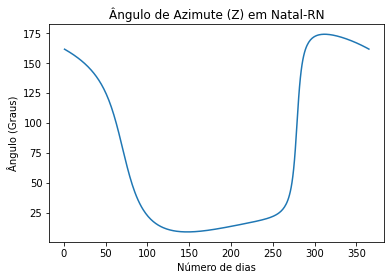

[[163.5345982  141.84989462 128.63164095 ... 229.41259853 214.82630595
  191.47601524]
 [163.68062709 141.88722767 128.61361133 ... 229.58790819 215.0519709
  191.71605202]
 [163.821706   141.91612032 128.58710545 ... 229.76995768 215.28354001
  191.95806124]
 ...
 [163.26550022 141.8172426  128.71150883 ... 229.01305098 214.32911904
  190.97662913]
 [163.4250508  141.87867154 128.71807282 ... 229.1667441  214.53530514
  191.20918554]
 [163.57981415 141.9319493  128.71634961 ... 229.32730264 214.74742133
  191.44362421]]


In [90]:
Azimute = np.zeros([365,24])
for i in range(0,365):
       for j in range(24):
              Azimute[i][j]=acosd((sind(delta[i])*cosd(L)-cosd(delta[i])*cosd(h[i][j])*sind(L))/cosd(alfa[i][j]))
              if sind(T*h[i][j])>0:
                  Azimute[i][j]=360-Azimute[i][j]
              else:
                  Azimute[i][j]=Azimute[i][j]

plt.plot(N, Azimute[:,11])
plt.title('Ângulo de Azimute (Z) em Natal-RN')
plt.xlabel('Número de dias')
plt.ylabel('Ângulo (Graus)')
plt.show()
print(Azimute)

#Angulo de incidencia 

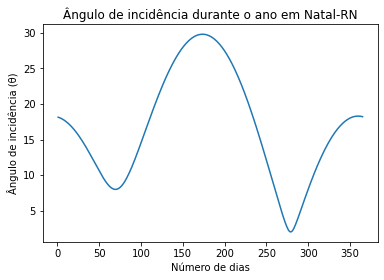

(365, 24)

In [94]:
beta=0   #Ângulo de inclinação da superfície em relação a horizontal
Zs=0  #Azimute de superfície 

#Para superfícies horizontais, β=0° e θ=delta
#Para superfícies verticais, β=90°
#Para uma superfície inclinada e voltada para o sul do hemisfério norte, Zs=0°
#Para uma superfície inclinada e voltada para o norte do hemisfério sul, Zs=180°

teta= np.zeros([365,24])

for i in range(0,365):
  for j in range(24):  
    teta[i][j]=acosd(sind(L)*sind(delta[i])*cosd(beta)-cosd(L)*sind(delta[i])*sind(beta)*cosd(Zs)+cosd(L)*cosd(delta[i])*cosd(h[i][j])*cosd(beta)+sind(L)*cosd(delta[i])*cosd(h[i][j])*sind(beta)*cosd(Zs)+cosd(delta[i])*sind(h[i][j])*sind(beta)*sind(Zs))
 
plt.plot(N, teta[:,11])
plt.title('Ângulo de incidência durante o ano em Natal-RN')
plt.xlabel('Número de dias')
plt.ylabel('Ângulo de incidência (θ)')
plt.show()

# Radiação extraterrestre




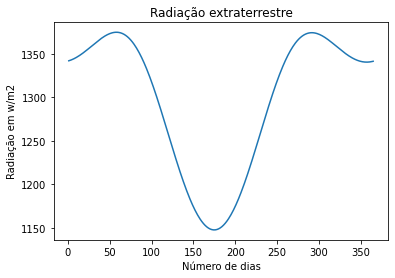

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,256.184081,579.993694,868.111167,1100.901768,1262.501204,1341.896739,1333.677700,1238.404201,1062.568972,818.154894,521.818383,193.754282,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,253.623348,577.810965,866.442394,1099.847879,1262.121223,1342.203765,1334.638012,1239.939558,1064.561946,820.456870,524.259688,196.155749,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,251.076618,575.651766,864.803959,1098.827953,1261.775400,1342.541700,1335.622763,1241.490104,1066.558708,822.749860,526.678731,198.522078,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,248.545863,573.517709,863.197008,1097.842594,1261.463759,1342.909990,1336.630862,1243.054286,1068.557351,825.031736,529.073308,200.851146,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,246.033033,571.410375,861.622646,1096.892360,1261.186274,1343.308030,1337.661166,1244.630506,1070.555936,827.300351,531.441215,203.140841,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,0.0,0.0,0.0,0.0,0.0,266.549918,588.822431,874.848322,1105.135401,1263.989983,1340.586391,1329.704707,1232.086499,1054.384287,808.708184,511.800608,183.895322,0.0,0.0,0.0,0.0,0.0,0.0
361,0.0,0.0,0.0,0.0,0.0,0.0,263.962119,586.557726,873.053856,1103.926273,1263.441401,1340.728550,1330.520727,1233.513578,1056.317981,811.009523,514.305569,186.426004,0.0,0.0,0.0,0.0,0.0,0.0
362,0.0,0.0,0.0,0.0,0.0,0.0,261.380555,584.310223,871.285263,1102.748799,1262.926975,1340.903913,1331.365613,1234.962094,1058.263098,813.310368,516.797028,188.929973,0.0,0.0,0.0,0.0,0.0,0.0
363,0.0,0.0,0.0,0.0,0.0,0.0,258.807266,582.081674,869.543888,1101.603832,1262.447005,1341.112211,1332.238545,1236.430733,1060.217920,815.608717,519.272837,191.405082,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
I_et=np.zeros([365,24])
Io=1367
for i in range(365):
    for j in range(24):
          I_et[i][j]= Io*(1+0.033*np.cos(np.deg2rad(360*i)/365))*np.cos(np.deg2rad(zenite[i][j]))     #I_et[i][j]=Io*(1+0.033*cosd((360*i)/365))*cosd(zenite[i][j])
          if I_et[i][j]<0:
            I_et[i][j]=0                  #queremos apenas os valores de dia, ou seja, maiores que 0
plt.plot(N, I_et[:,11])
plt.title('Radiação extraterrestre')
plt.xlabel('Número de dias')
plt.ylabel('Radiação em w/m2')
plt.show()
I_et_tabela=pd.DataFrame(I_et) 
I_et_tabela #round

#Ângulo horario ao por do sol

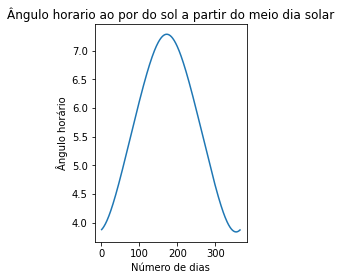

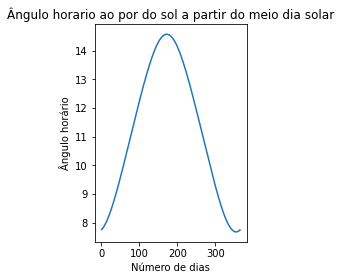

In [189]:
#Hss=[]
#for i in range(365):
#    Hss.insert(i,((1/15)*acosd(-tand(L)-tand(delta[i]))))
#  
#print(Hss)
Hss=np.zeros([365,])
for i in range(365):
  Hss[i]=(1/15)*acosd(-tand(L)-tand(delta[i]))
#fig = plt.figure(facecolor='orange') 

plt.subplot(1,2,1) 
plt.plot(N,Hss)
plt.title('Ângulo horario ao por do sol a partir do meio dia solar')
plt.xlabel('Número de dias')
plt.ylabel('Ângulo horário')
plt.show()  
#fig = plt.figure(facecolor='black')
Hss=pd.DataFrame(Hss)
Hss  


plt.subplot(1,2,2)
plt.plot(N,2*Hss)
plt.title('Ângulo horario ao por do sol a partir do meio dia solar')
plt.xlabel('Número de dias')
plt.ylabel('Ângulo horário')
plt.show()  


#Caminho solar

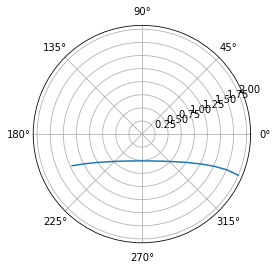

In [191]:
Radalfa=np.zeros([365,24])
Radazimute=np.zeros([365,24])
for i in range(365):
    for j in range(5,20):
      Radalfa[i][j]=np.deg2rad(-(alfa[i][j]-90))        #Adequação dos valores do gráfico para implementação polar
      Radazimute[i][j]=np.deg2rad(-(Azimute[i][j]+90))  #Adequação dos valores do gráfico para implementação polar
plt.polar(Radazimute[172][6:20],Radalfa[172][6:20])      
